In [1]:
print("Hello World")

Hello World


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("aizahzeeshan/lung-cancer-risk-in-25-countries")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/lung-cancer-risk-in-25-countries


In [4]:
df = pd.read_csv('/kaggle/input/lung-cancer-risk-in-25-countries/lung_cancer_prediction_dataset.csv')

In [5]:
df.head()  # View the first few rows

,ID,Country,Population_Size,Age,Gender,Smoker,Years_of_Smoking,Cigarettes_per_Day,Passive_Smoker,Family_History,...,Air_Pollution_Exposure,Occupational_Exposure,Indoor_Pollution,Healthcare_Access,Early_Detection,Treatment_Type,Developed_or_Developing,Annual_Lung_Cancer_Deaths,Lung_Cancer_Prevalence_Rate,Mortality_Rate
0,0,China,1400,80,Male,Yes,30,29,No,No,...,Low,Yes,No,Poor,No,NaN,Developing,690000,2.44,0.0
1,1,Iran,84,53,Male,No,0,0,Yes,No,...,Low,Yes,No,Poor,No,NaN,Developing,27000,2.10,0.0
2,2,Mexico,128,47,Male,Yes,12,6,Yes,No,...,Medium,No,No,Poor,Yes,NaN,Developing,28000,1.11,0.0
3,3,Indonesia,273,39,Female,No,0,0,No,Yes,...,Low,No,No,Poor,No,NaN,Developing,40000,0.75,0.0
4,4,South Africa,59,44,Female,No,0,0,Yes,No,...,Medium,Yes,No,Poor,No,NaN,Developing,15000,2.44,0.0


In [6]:
df.info()  # Get information about the DataFrame

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 220632 entries, 0 to 220631
Data columns (total 24 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   ID                           220632 non-null  int64  
 1   Country                      220632 non-null  object 
 2   Population_Size              220632 non-null  int64  
 3   Age                          220632 non-null  int64  
 4   Gender                       220632 non-null  object 
 5   Smoker                       220632 non-null  object 
 6   Years_of_Smoking             220632 non-null  int64  
 7   Cigarettes_per_Day           220632 non-null  int64  
 8   Passive_Smoker               220632 non-null  object 
 9   Family_History               220632 non-null  object 
 10  Lung_Cancer_Diagnosis        220632 non-null  object 
 11  Cancer_Stage                 8961 non-null    object 
 12  Survival_Years               220632 non-null  int64  
 13 

In [7]:
df.describe()  # Summary statistics

,ID,Population_Size,Age,Years_of_Smoking,Cigarettes_per_Day,Survival_Years,Annual_Lung_Cancer_Deaths,Lung_Cancer_Prevalence_Rate,Mortality_Rate
count,220632.000000,220632.000000,220632.000000,220632.000000,220632.000000,220632.000000,220632.000000,220632.000000,220632.000000
mean,110315.500000,229.779882,52.518352,8.175274,7.007515,0.223526,63931.086928,1.502085,3.049802
std,63691.116633,349.247477,19.078215,12.377248,9.802187,1.231025,130690.126777,0.578043,14.924169
min,0.000000,54.000000,20.000000,0.000000,0.000000,0.000000,10005.000000,0.500000,0.000000
25%,55157.750000,83.000000,36.000000,0.000000,0.000000,0.000000,23000.000000,1.000000,0.000000
50%,110315.500000,113.000000,53.000000,0.000000,0.000000,0.000000,30000.000000,1.500000,0.000000
75%,165473.250000,206.000000,69.000000,15.000000,14.000000,0.000000,45000.000000,2.000000,0.000000
max,220631.000000,1400.000000,85.000000,40.000000,30.000000,10.000000,690000.000000,2.500000,90.000000


In [8]:
# Check for missing values
print(df.isnull().sum())

# Handle missing values (e.g., fill with median for continuous features)
df['Age'].fillna(df['Age'].median(), inplace=True)
df['Years_of_Smoking'].fillna(df['Years_of_Smoking'].median(), inplace=True)
df['Cigarettes_per_Day'].fillna(df['Cigarettes_per_Day'].median(), inplace=True)

# Remove duplicates
df.drop_duplicates(inplace=True)

ID                                  0
Country                             0
Population_Size                     0
Age                                 0
Gender                              0
Smoker                              0
Years_of_Smoking                    0
Cigarettes_per_Day                  0
Passive_Smoker                      0
Family_History                      0
Lung_Cancer_Diagnosis               0
Cancer_Stage                   211671
Survival_Years                      0
Adenocarcinoma_Type                 0
Air_Pollution_Exposure              0
Occupational_Exposure               0
Indoor_Pollution                    0
Healthcare_Access                   0
Early_Detection                     0
Treatment_Type                 213968
Developed_or_Developing             0
Annual_Lung_Cancer_Deaths           0
Lung_Cancer_Prevalence_Rate         0
Mortality_Rate                      0
dtype: int64


<ipython-input-8-3d20cad00648>:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].median(), inplace=True)
<ipython-input-8-3d20cad00648>:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try usin

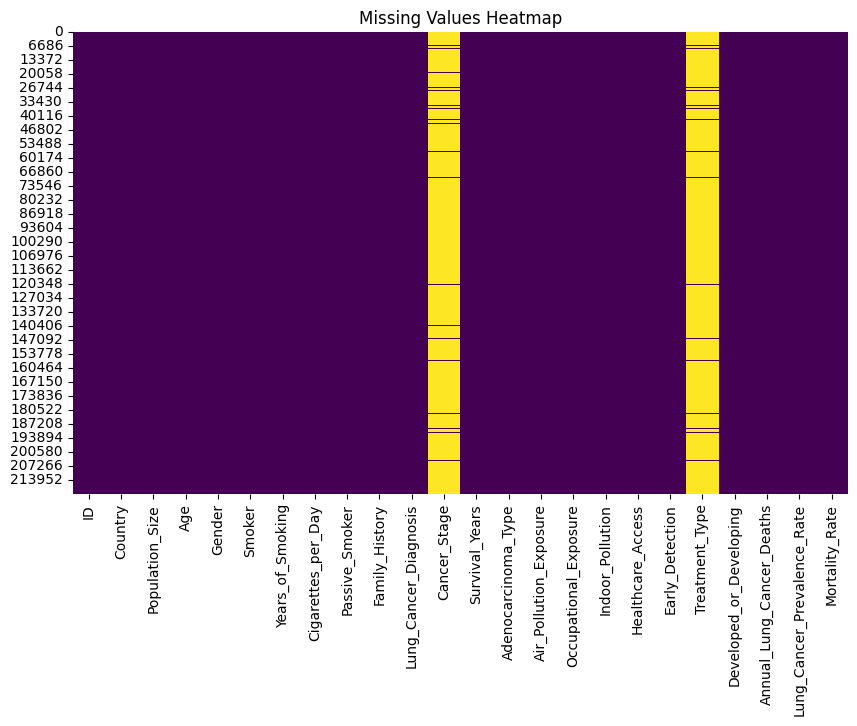

In [9]:
# Heatmap of missing values
plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values Heatmap')
plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


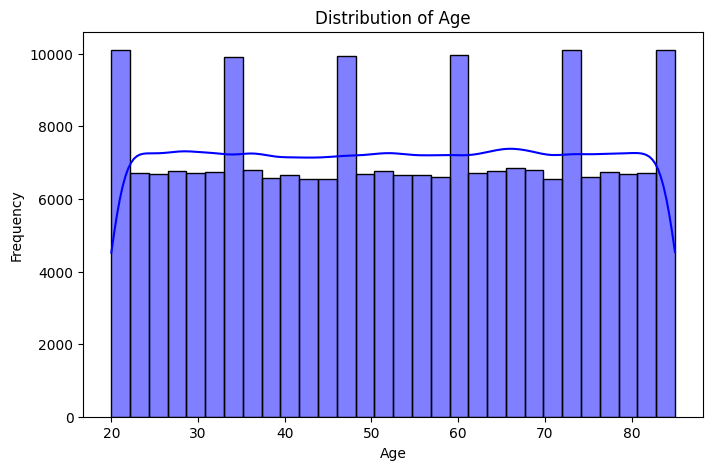

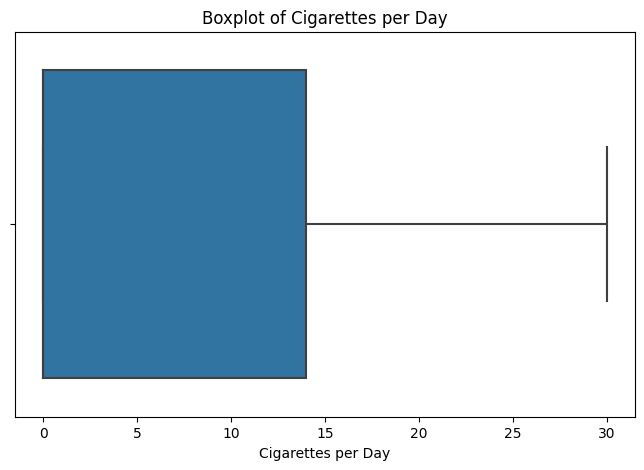

In [10]:
# Histogram for Age
plt.figure(figsize=(8, 5))
sns.histplot(df['Age'], kde=True, bins=30, color='blue')
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

# Boxplot for Cigarettes_per_Day
plt.figure(figsize=(8, 5))
sns.boxplot(x=df['Cigarettes_per_Day'])
plt.title('Boxplot of Cigarettes per Day')
plt.xlabel('Cigarettes per Day')
plt.show()

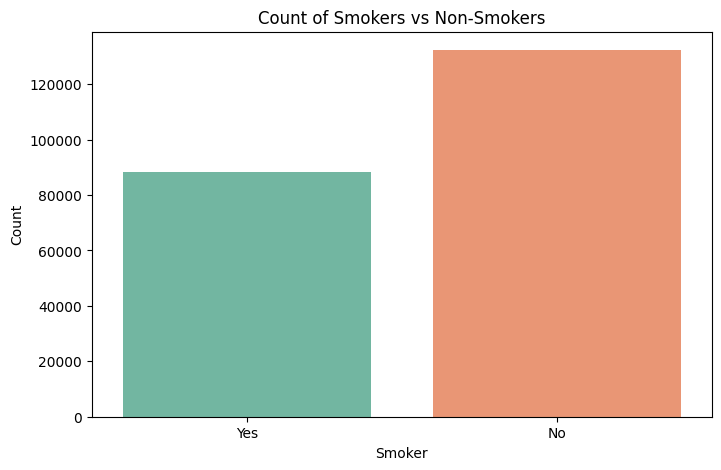

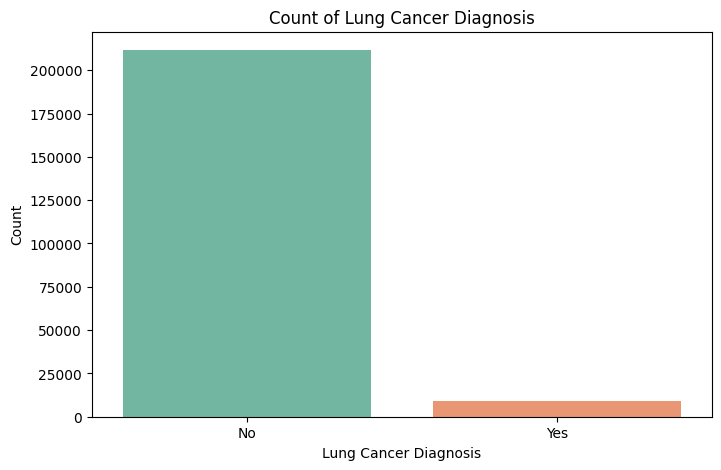

In [11]:
# Count plot for Smoker
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='Smoker', palette='Set2')
plt.title('Count of Smokers vs Non-Smokers')
plt.xlabel('Smoker')
plt.ylabel('Count')
plt.show()

# Count plot for Lung Cancer Diagnosis
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='Lung_Cancer_Diagnosis', palette='Set2')
plt.title('Count of Lung Cancer Diagnosis')
plt.xlabel('Lung Cancer Diagnosis')
plt.ylabel('Count')
plt.show()

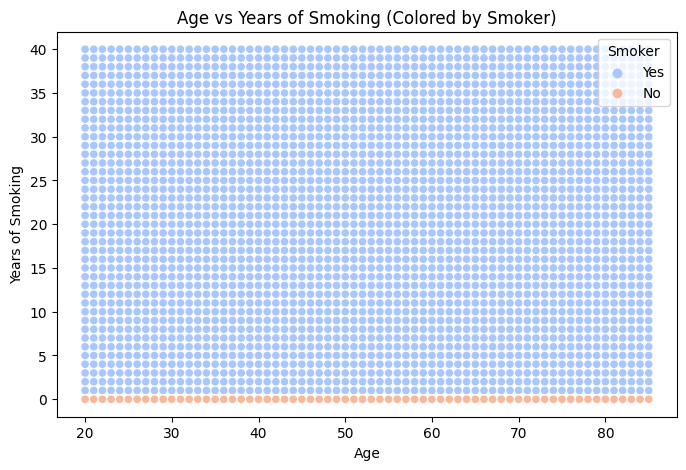

In [12]:
# Scatter plot: Age vs Years_of_Smoking
plt.figure(figsize=(8, 5))
sns.scatterplot(data=df, x='Age', y='Years_of_Smoking', hue='Smoker', palette='coolwarm')
plt.title('Age vs Years of Smoking (Colored by Smoker)')
plt.xlabel('Age')
plt.ylabel('Years of Smoking')
plt.show()

In [13]:
print(df.columns)

Index(['ID', 'Country', 'Population_Size', 'Age', 'Gender', 'Smoker',
       'Years_of_Smoking', 'Cigarettes_per_Day', 'Passive_Smoker',
       'Family_History', 'Lung_Cancer_Diagnosis', 'Cancer_Stage',
       'Survival_Years', 'Adenocarcinoma_Type', 'Air_Pollution_Exposure',
       'Occupational_Exposure', 'Indoor_Pollution', 'Healthcare_Access',
       'Early_Detection', 'Treatment_Type', 'Developed_or_Developing',
       'Annual_Lung_Cancer_Deaths', 'Lung_Cancer_Prevalence_Rate',
       'Mortality_Rate'],
      dtype='object')


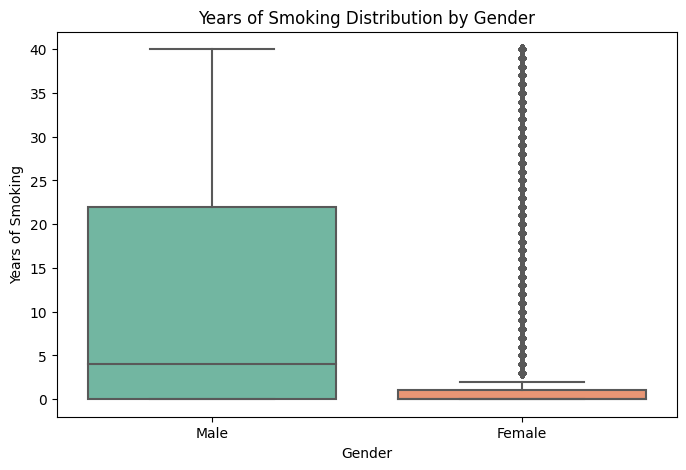

In [14]:
# Boxplot: Years_of_Smoking by Gender
plt.figure(figsize=(8, 5))
sns.boxplot(data=df, x='Gender', y='Years_of_Smoking', palette='Set2')
plt.title('Years of Smoking Distribution by Gender')
plt.xlabel('Gender')
plt.ylabel('Years of Smoking')
plt.show()

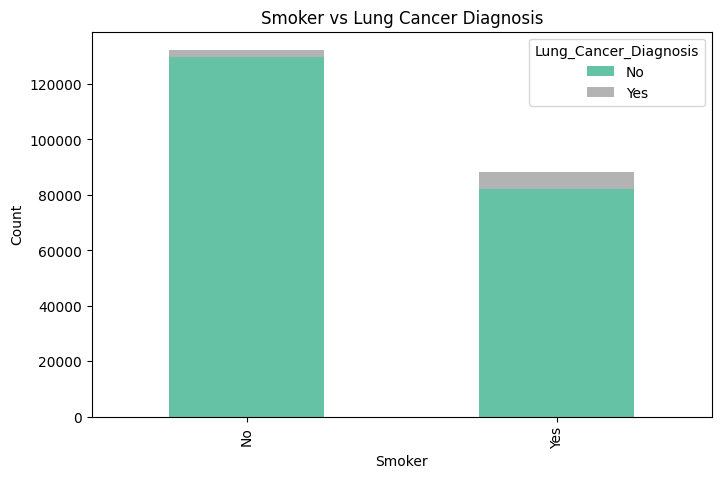

In [15]:
# Cross-tabulation: Smoker vs Lung Cancer Diagnosis
cross_tab = pd.crosstab(df['Smoker'], df['Lung_Cancer_Diagnosis'])
cross_tab.plot(kind='bar', stacked=True, figsize=(8, 5), colormap='Set2')
plt.title('Smoker vs Lung Cancer Diagnosis')
plt.xlabel('Smoker')
plt.ylabel('Count')
plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


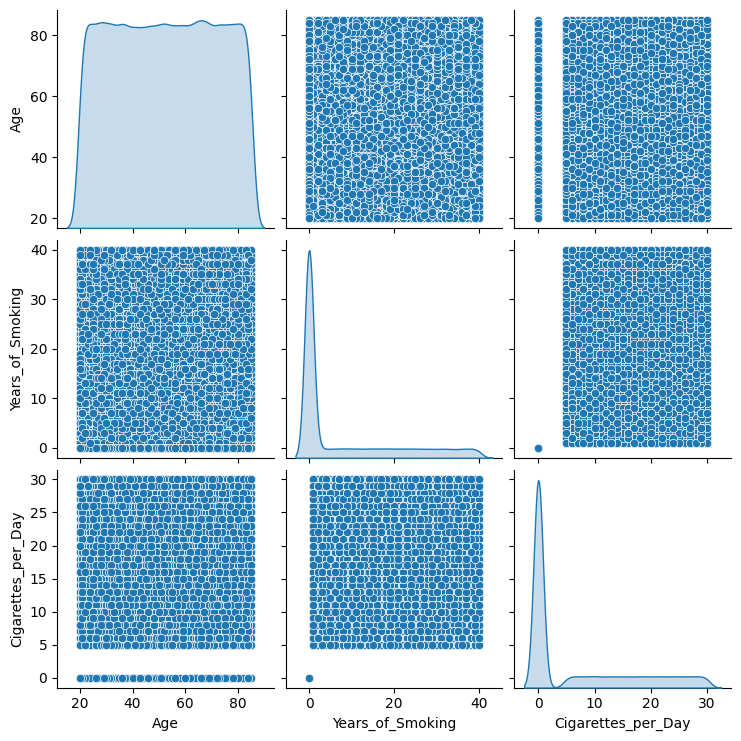

In [16]:
# Pair plot for selected numerical features
sns.pairplot(df[['Age', 'Years_of_Smoking', 'Cigarettes_per_Day']], diag_kind='kde')
plt.show()

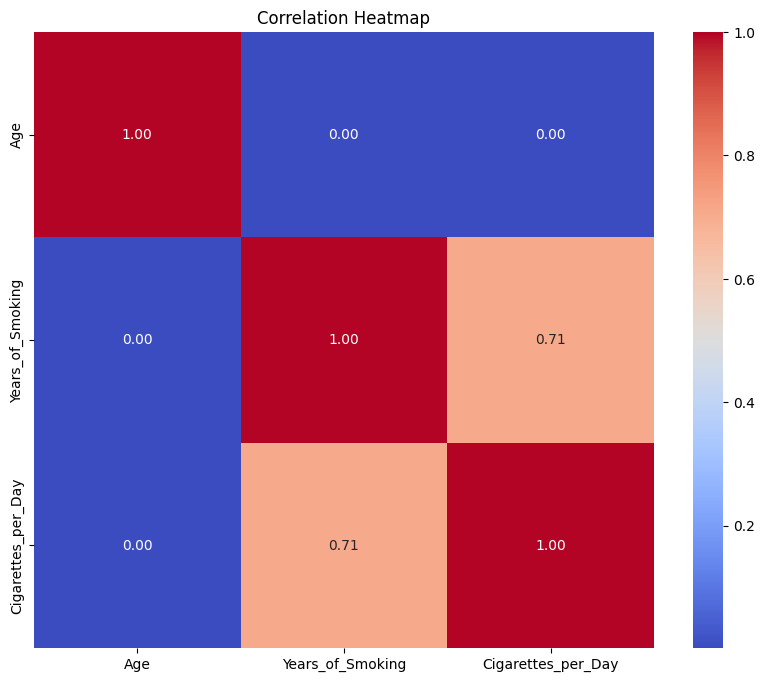

In [17]:
# Correlation heatmap
plt.figure(figsize=(10, 8))
corr_matrix = df[['Age', 'Years_of_Smoking', 'Cigarettes_per_Day']].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()